## Netflix Case Study Analysis 
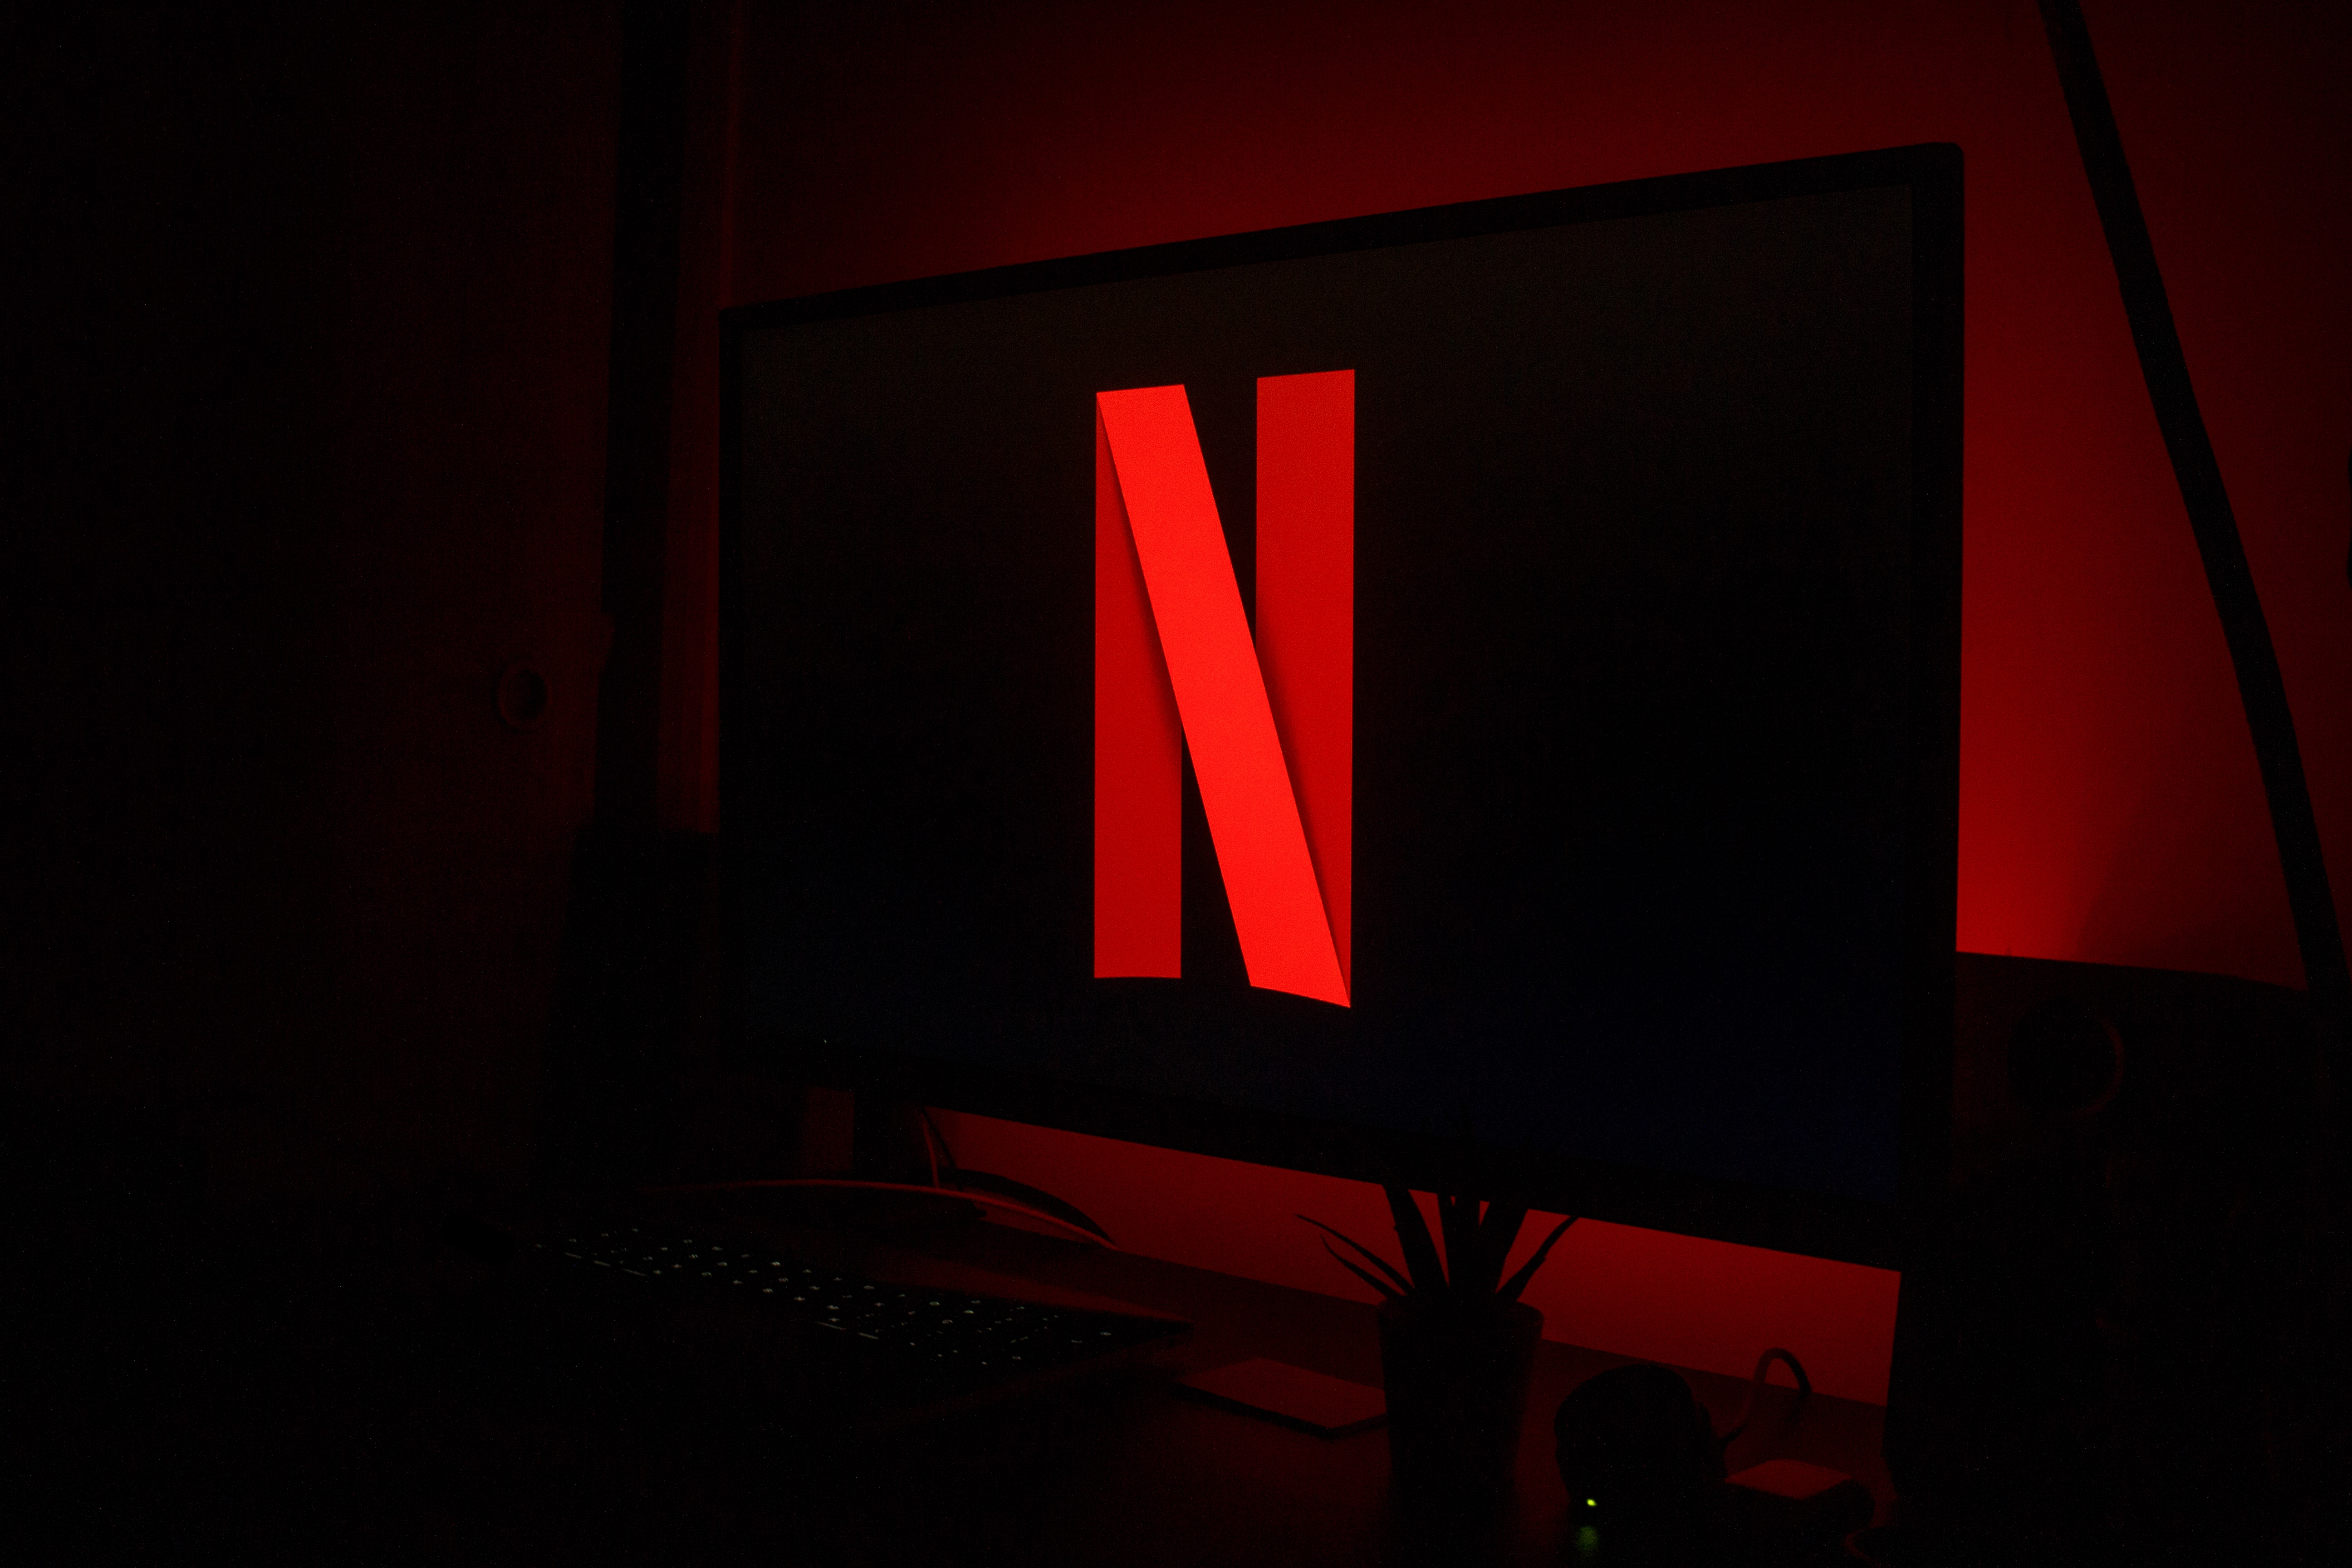

<p>Netflix, the world's most popular video streaming service, began by mailing DVDs to their customers. It has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 222 million subscribers as of <a href="https://www.theguardian.com/media/2022/apr/20/why-is-netflix-losing-so-many-subscribers-and-what-can-it-do-about-it">April 2022</a>.</p>

<p>It now consumes over 15% of global internet bandwidth and has over 190 nations as subscribers.<p>
    

<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex my data manipulation skills and dive into the entertainment industry. I've also been brushing up on my Python skills and has taken a first crack at a CSV file containing Netflix data.<p>
    
** Disclaimer: This analysis is not meant to answer or interprete the recent news of Netflix lost thousands of subscribers in the first quarter 2022. 


**IMPORT LIBRARIES**

First, we have to import libraries we need before proceeding further.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**IMPORT DATA**

I collected and used TV Shows and Movies listed on the Netflix dataset from Kaggle. The dataset consists of TV Shows and Movies available on Netflix as of Jan, 2021. I imported csv data with variable name as 'netflix'.

In [92]:
netflix = pd.read_csv('netflix_titles.csv', index_col = 0)

Now, the first 5 rows of table can be clearly seen below.

In [93]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


The dataset contains over 7787 rows with 11 columns. 


In [94]:
#To see how many rows and columns in this dataset
netflix.shape

(7787, 11)

Most of variables in the column are typed as object except the column of 'release_year'


In [95]:
netflix.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [96]:
netflix.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

We can also see that there are missing values in some columns.

In [97]:
#To see a number of missing values for each variables
netflix.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [98]:
#column of missing values in percentage
round((netflix.isnull().sum()/len(netflix.index))*100, 2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

**Missing Values**

- Director column has 2389 missing values (31%)
- Cast column has 718 missing values (9.22%)
- Country column has 507 missing values (6.51)
- date_added column has 507 missing values (0.13%)
- While rating column has 7 missing values (0.09%) 

**HANDING MISIING VALUES**
- When we look at the data, some columns have an considerable amount of missing values. We need to clean it in order to have better analysis later.

In [99]:
#we can fill the missing values with string values 

#director column
netflix['director'].fillna('Unknown', inplace=True)

#Cast column
netflix['cast'].fillna('Unknown', inplace=True)

In [100]:
#we can also fill the missing values by replacing with the most common used values (mode)

#country column
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

In [101]:
#convert date column to datetime64
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['month_added'] = netflix['date_added'].dt.month
netflix['month_name_added'] = netflix['date_added'].dt.month_name()
netflix['year_added'] = netflix['date_added'].dt.year


In [102]:
netflix['year_added'] = netflix['year_added'].astype(str).apply(lambda x: x.replace('.0',''))

In [103]:
#to check if the NaN values is gone
netflix['year_added'].isnull().sum()

0

Now, let's take a look at the new dataframe after I completed the missing values

In [104]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
show_id,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0,August,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,December,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,December,2018
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.0,November,2017
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,January,2020


In [105]:
netflix.dtypes

type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                float64
month_name_added            object
year_added                  object
dtype: object

# Now the data is ready to be analysed.
<hr/>

**1. TOTAL NUMBER OF MOVIES AND SHOWS OVER THE YEARS**

- As we can see the summary below, the year of 2019 has the highest numbers of new movies and TV shows released followed by the year of 2020, 2018, 2017, and so forth.
- We have small numbers in 2021 due to lacks of data provided in the dataset. The data given only up to January 2021. 


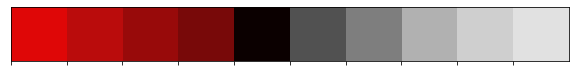

In [90]:
ntflx_clr = ['#df0707', '#ba0c0c', '#980a0a', '#780909','#0b0000', '#515151', '#7E7E7E', '#B1B1B1', '#CFCFCF', '#E1E1E1']
sns.palplot(sns.color_palette(ntflx_clr))

In [106]:
#let's see how many movies and shows added into each years
netflix['year_added'].value_counts()


2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
nan       10
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

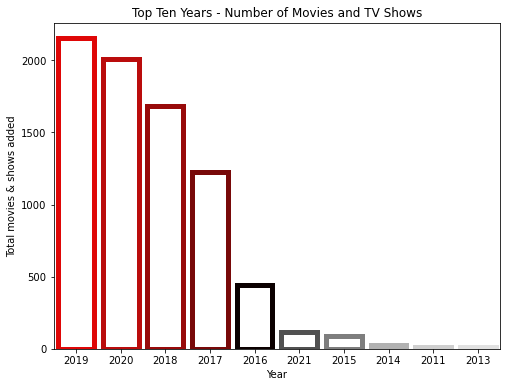

In [107]:
#the visualisation graph
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.countplot(x = 'year_added', data=netflix, order=netflix['year_added'].value_counts().index[:10], 
            facecolor=(0, 0, 0, 0), linewidth=5, edgecolor = sns.color_palette(ntflx_clr))
plt.title('Top Ten Years - Number of Movies and TV Shows')
plt.xlabel('Year')
plt.ylabel('Total movies & shows added')
plt.show()

<hr/>

**2. THE PROPORTION OF MOVIES AND TV SHOWS**

- If you've been wondering which one of the movies and TV shows dominated Netflix's libraries, you can see the table below that over the years Netflix released 5377 titles on movies than TV show which has 2410 titles.

- Seeing the pie chart below, it's more obvious that Netflix movies has bigger proportion which almost reached 70% compared to the TV shows which only took 31%.

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

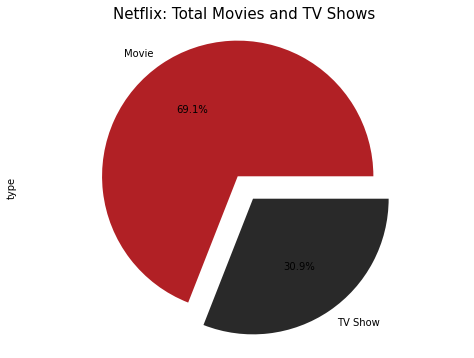

In [108]:
netflix_prop = netflix.groupby('type').type.count()
display(netflix_prop)

netflix_prop.plot.pie(y = 'type',
                    figsize = (8, 6),
                    autopct= '%.1f%%',
                    colors = ['#B12025','#292929'],
                    explode = (0.2, 0))
                   
plt.axis('equal')
plt.title('Netflix: Total Movies and TV Shows', size=15)
plt.show()

<hr/>

**3. THE GROWTH OF RELEASED MOVIES AND TV SHOWS ON NETFLIX FROM FREQUENCY AND DENSITY LOOK**

In the left-side graph, we tried to stretch the interval by 20 years since 1940. It illustrated that TV shows have lower frequency of realeased titles compared to movies. However, as you can see in the next graph with interval of 5 years, the tv shows have higher movement in the last decade although the slope is steeper with each decade. Whereas, from density perspective, the growth of movies title has decreased after 2015.


type
Movie      AxesSubplot(0.125,0.125;0.352273x0.755)
TV Show    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: release_year, dtype: object

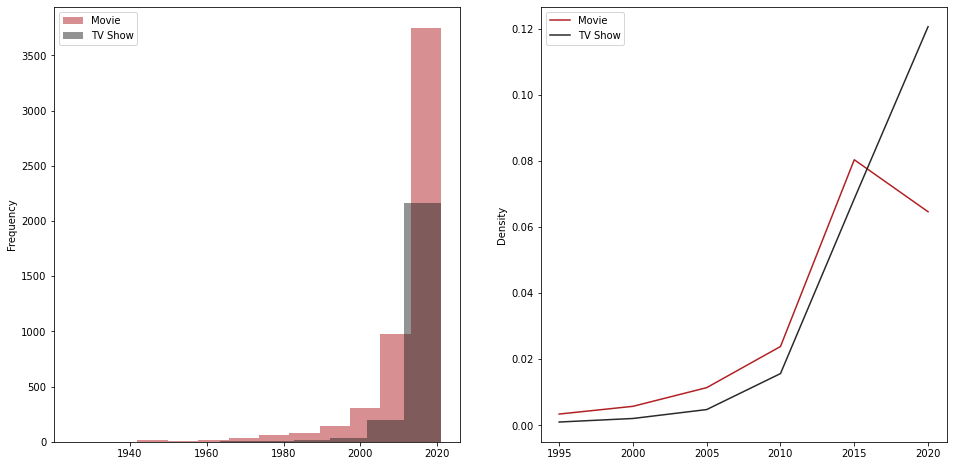

In [109]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
netflix.groupby('type')['release_year'].plot(kind='kde', ax=axs[1],ind = [1995, 2000, 2005, 2010, 2015, 2020], legend=True,
                                            color = {'Movie' : '#B12025', 'TV Show': '#292929'})
netflix.groupby('type')['release_year'].plot(kind = 'hist', alpha=0.5, ax=axs[0], legend=True, 
                                            color = {'Movie' : '#B12025', 'TV Show': '#292929'})

<hr/>

**4. THE AMOUNT OF CONTENT PRODUCTION BY COUNTRY**

Now we have some ideas the growth of movies and TV shows on Netflix. Now what? Have you been wondering which countries that led the amount of content production over the period? If so, the answer is here. 

By looking at the chart below, it is no surprise to see that the US significantly dominates among top 15 countries for both categories. It is clearly to understand that the US has released over 2000 movies compare to the TV shows in Netflix. Now, my mind blown away after looking the fact that India turned out to be the second largest contributor in Netflix that have released almost 1000 titles of movies over TV shows. All this time, I had a perception that UK always followed after the US. In fact, the UK came up as the third contributor after India in which has similar portion for both categories rougly below 200 titles each. 

In this chart, you will also see the next contributor in Netflix comes from Japan and South Korea. Both countries have way more TV shows than movies (of course). Japan has been famous with their Anime shows to make our Otaku friends and Weebu fellows in a happy place, while South Korea has been a soulmate to our K-drama lovers.

The other countries followed after can bee seen more below.

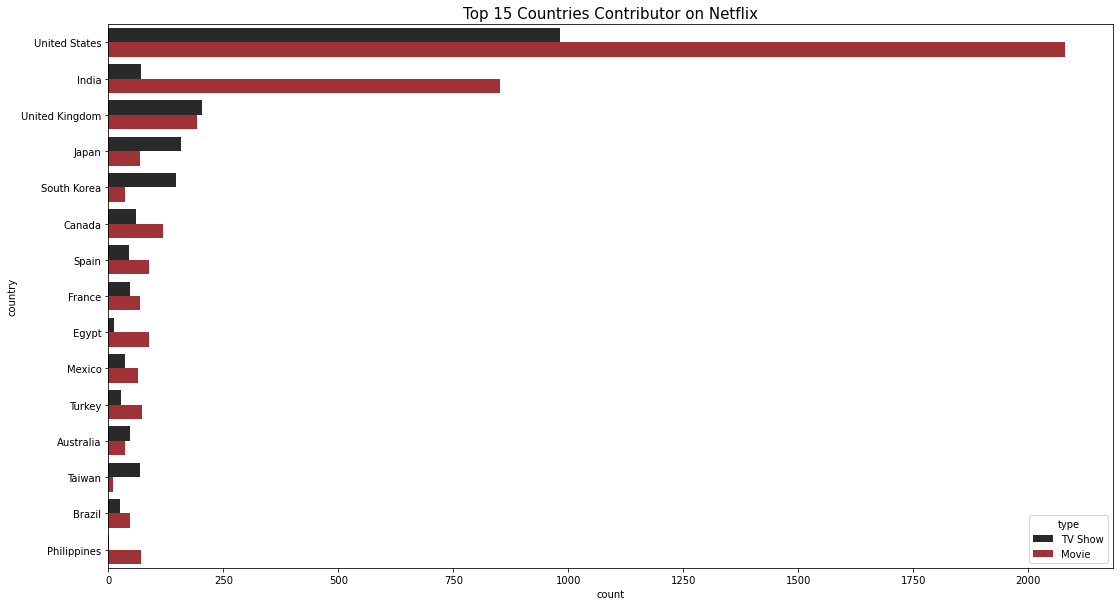

In [110]:
fig = plt.figure(figsize= (18, 10))
sns.countplot(data = netflix, y = 'country', order = netflix['country'].value_counts().index[:15],
            hue = 'type', palette = ['#292929','#B12025'])
plt.title('Top 15 Countries Contributor on Netflix', size = 15)
plt.show()

<hr/>

**5. TOP GENRES ON NETFLIX**

Let's take a look which genres on Netflix that take places on the top.
The first genre that takes the first place is 'International Movies'. In this case, we're defining "international" as anything that wasn't made in the U.S, for example: Roma, Spirited Away, etc. The other top 4 genres are Dramas, Comedies, International TV shows, and Documenteries. Whereas, the least favorite genres in Netflix are Music & Musicals, Horror Movies, and British TV Shows.


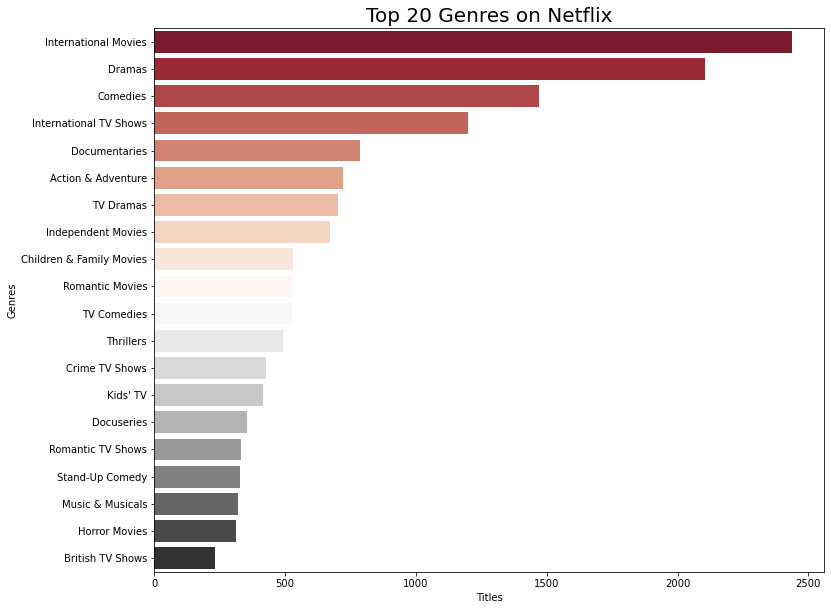

In [111]:
genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,10))
sns.countplot(y = genres, order=genres.value_counts().index[:20], palette= 'RdGy')
plt.title('Top 20 Genres on Netflix', size = 20)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

<hr/>

**6. LET'S DIG DEEPER THE TOP DIRECTORS AND ACTORS IN MOVIES AND TV SHOWS**

**Let's start with the top directors and actors in 'TV Show' category.**


In [112]:
#df for TV shows and Movies
tv_shows = netflix[netflix.type == 'TV Show'].copy()
movie = netflix[netflix.type == 'Movie'].copy()

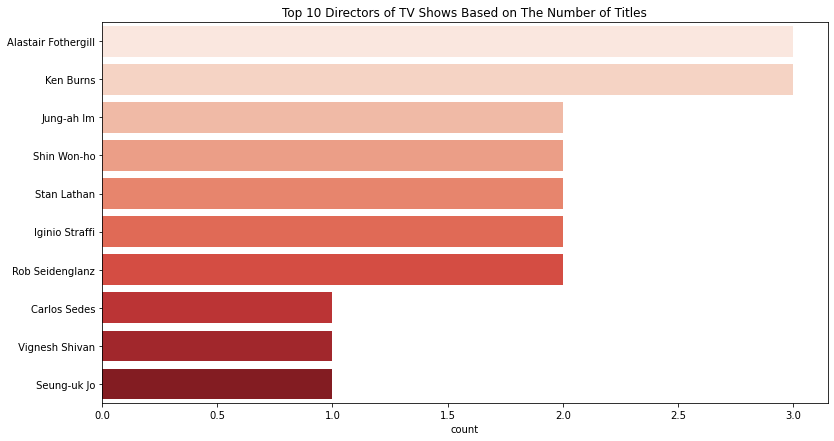

In [168]:
#Top 10 Directors as per TV Shows
tv_director = tv_shows[tv_shows.director != 'Unknown'].set_index('title').director.str.split(",", expand = True).stack().reset_index(level=1,drop=True)

plt.figure(figsize=(13,7))
sns.countplot(y = tv_director, order=tv_director.value_counts().index[:10], palette = 'Reds')
plt.title('Top 10 Directors of TV Shows Based on The Number of Titles')
plt.show()

In [114]:
#Top 10 TV show actors
print('TOP 10 ACTORS - TV SHOW')
tv_cast = pd.DataFrame(netflix.cast.str.split(',').tolist(), index=netflix.type).stack().reset_index([0, 'type'])
tv_cast.columns = ['type', 'actor']

tv_cast.loc[(tv_cast["type"]=='Movie') & (tv_cast["actor"] != 'Unknown')]["actor"].value_counts().head(10)


TOP 10 ACTORS - TV SHOW


 Anupam Kher         37
 Om Puri             27
Shah Rukh Khan       27
 Boman Irani         25
 Paresh Rawal        24
Akshay Kumar         22
 Kareena Kapoor      20
Adam Sandler         19
 Gulshan Grover      18
 Naseeruddin Shah    18
Name: actor, dtype: int64

**Next, we analyse the top directors and actors for Movie category.**

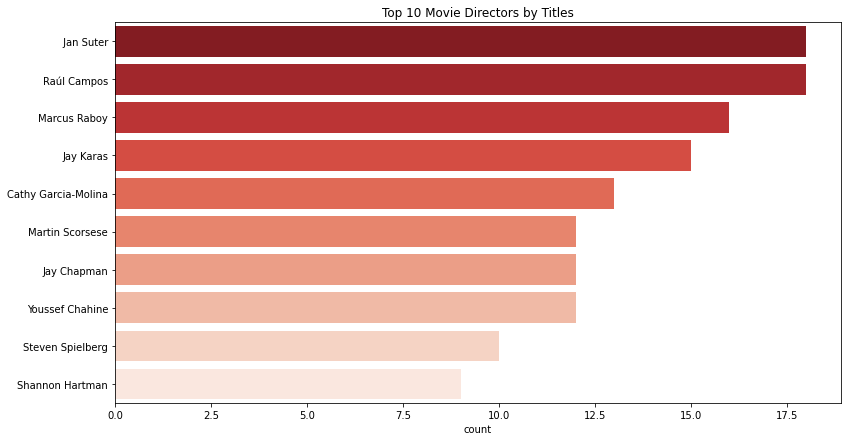

In [163]:
#Top 10 movie directors by the amount of titles over the period of time
unknown_dir = netflix[netflix.director != 'Unknown'].set_index('title').director.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13, 7))
sns.countplot(y = unknown_dir, order = unknown_dir.value_counts().index[:10], palette = 'Reds_r')
plt.title('Top 10 Movie Directors by Titles')
plt.show()

In [116]:
#Top 10 Movie Actors
print('TOP 10 ACTORS - MOVIE')
cast = pd.DataFrame(netflix.cast.str.split(',').tolist(), index=netflix.type).stack().reset_index([0, 'type'])
cast.columns = ['type', 'actor']

cast.loc[(cast["type"]=='TV Show') & (tv_cast["actor"] != 'Unknown')]["actor"].value_counts().head(10)


TOP 10 ACTORS - MOVIE


 Takahiro Sakurai     22
 Ai Kayano            16
 Junichi Suwabe       15
 Yuki Kaji            15
David Attenborough    13
 Daisuke Ono          13
 Yoshimasa Hosoya     12
 Kana Hanazawa        12
 Tomokazu Sugita      12
 Vincent Tong         11
Name: actor, dtype: int64

We can conclude from the chart and details above that most popular directors and actors for both movies and TV shows with the most titles are mainly from international which correlated to the previous graph of top 10 genres that shown 'International Movies' takes the first place.

<hr/>

**7. AVERAGE DURATIONS - MOVIE & TV SHOW**

We are going to investigate further on the average duration between both categories, movie and TV show. Any some idead that movie lengths have decreased over the past ten years? Or the longest seasons for TV shows no more than just 1 season? Let's figure out. 

In [125]:
#Movie duration

movie['duration'] = movie['duration'].apply(str).replace(' min','').astype(int)

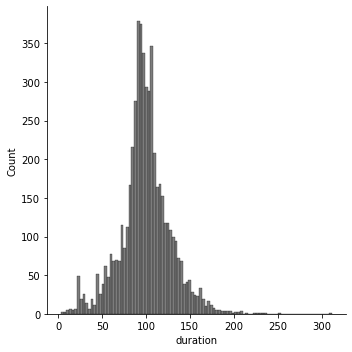

In [155]:
sns.displot(data=movie,x='duration',bins=100, color = '#515151')

/Users/kponeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


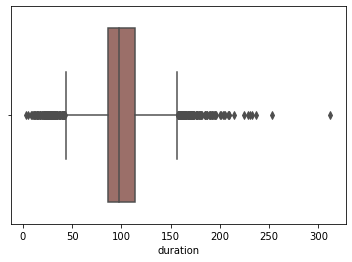

In [171]:
sns.boxplot(movie['duration'], color = '#a46960')
plt.show()

From the plots above, we can summarise that:
    
1. The average amount of movie duration is 100 mins.
    
2. There are several movies which are less than 50 mins and more than 150 mins that we can consider them as outlier data. Outlier data in statistics is a data point that differs significantly from other observations which in this case the normal duration between 50 - 150 mins. 

In [131]:
#TV show duration 
tv_shows['duration'] == tv_shows['duration'].str.split(' ').str[0]
tv_shows.rename(columns = {'duration' : 'season'}, inplace = True)


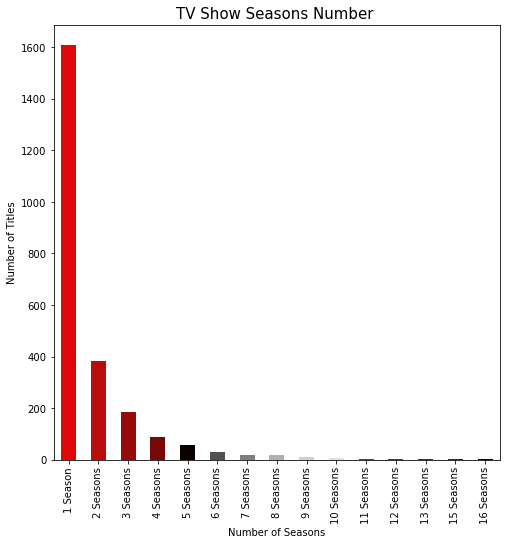

In [160]:
plt.figure(figsize=(8,8))
tv_shows['season'].value_counts().plot(kind = 'bar', color=ntflx_clr)
plt.title('TV Show Seasons Number ', size = 15)
plt.ylabel('Number of Titles')
plt.xlabel('Number of Seasons')
plt.show()

From the plots above, we can summarise that:
- Most TV shows in Netflix particularly released only for 1 season which the total of titles is reaching up to 1600.
- Not many TV shows have over 3 seasons as we can see that the titles number is below 200.

<hr/>

**8. AMOUNT OF CONTENT BY TARGETED AGE**

As we all might be aware that not all movies and TV shows are made for adults. There are other categories that specifically targeting other audiences such as teens, kids, or older kids. But what percentage they contribute on Netflix contents? You will find out more below.

In [17]:
#fill missing values on rating
netflix['rating'].fillna(netflix['rating'].mode()[0], inplace=True)

In [18]:
#create new rating dict
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}


In [20]:
#creating new column
netflix['targeted_age'] = netflix['rating'].replace(rating_ages)
netflix['targeted_age'].unique() 


array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [22]:
#drop rating column
netflix.drop(columns=['rating'], inplace = True)

In [23]:
#check new column
netflix.sample()

,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,month_added,month_name_added,year_added,targeted_age
show_id,,,,,,,,,,,,,,
s6544,Movie,The Lamb,Timothy Reckart,"Steven Yeun, Keegan-Michael Key, Aidy Bryant, ...",United States,2018-06-04,2017,86 min,"Children & Family Movies, Faith & Spirituality",A big-dreaming donkey escapes his menial exist...,6.0,June,2018,Older Kids


In [24]:
netflix['targeted_age'].count()

7787

In [25]:
netflix['targeted_age'].value_counts()

Adults        3627
Teens         2317
Older Kids    1330
Kids           513
Name: targeted_age, dtype: int64

type,Movie,TV Show
targeted_age,,
Adults,71.68,28.32
Kids,52.05,47.95
Older Kids,64.06,35.94
Teens,71.56,28.44


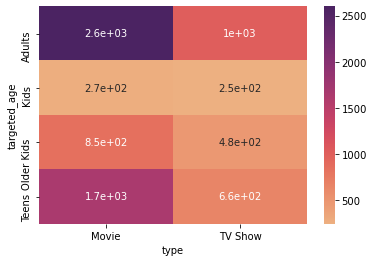

In [29]:
sns.heatmap(pd.crosstab(netflix['targeted_age'], netflix['type']), annot=True, cmap = 'flare')
pd.crosstab(netflix['targeted_age'], netflix['type']).apply(lambda x: round((x/x.sum())*100,2), axis=1)

The largest count of Netflix content is made with “Adults” and "Teens" rating in movies. 

In Adult and Teens, about 72% are movies and 28% TV Show so we can conclude that adult and Teens prefer to watch movies rather than TV shows.



**9. TOTAL DISTRIBUTION MOVIES AND TV SHOWS**

After we analysed lots of information from the data, now we moved on to answer the question of how many of each movies and TV shows released each period of time?

The pair graph indicated that after the year of 2000, Netflix released more movies and TV shows. Movies is showed that it mostly takes place on Netflix library. 

The last graph in heatmap style, you will see the darker shade is, the bigger amount of titles released on Netflix. Therefore, starting from 2017, Netflix gradually updated their library with more movies and TV shows. The highest number of released is in November, 2019 with the number of titles is 272 which is the darkest shade as you can see. 


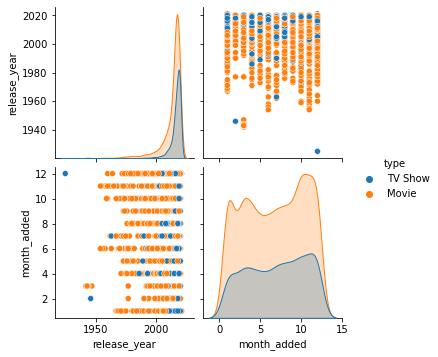

In [179]:
#distribution pair graph
sns.pairplot(netflix, hue='type')


In [193]:
#number of releases in table
netflix.pivot_table(index='month_added', columns='year_added', values='title', aggfunc='count')

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,44.0,72.0,130.0,162.0,228.0,117.0
2.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,4.0,16.0,84.0,88.0,159.0,117.0,NaN
3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,17.0,140.0,175.0,179.0,152.0,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,22.0,95.0,118.0,171.0,188.0,NaN
5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,7.0,13.0,88.0,101.0,159.0,173.0,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,19.0,95.0,78.0,175.0,167.0,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,29.0,80.0,157.0,169.0,156.0,NaN
8.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,NaN
9.0,NaN,NaN,NaN,1.0,NaN,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,NaN


<AxesSubplot:xlabel='year_added', ylabel='month_added'>

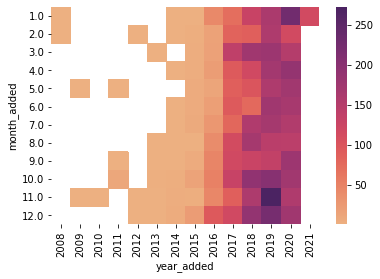

In [194]:
#number of releases in heatmap
sns.heatmap(netflix.pivot_table(index='month_added', columns='year_added', values='title', aggfunc='count'), cmap = 'flare')

**THE END OF ANALYSIS**

Thank you for your time reading and looking through my analysis. It's not perfect but this analysis is based on my basic knowledge in python and data analysis. Through this practice, I am hoping in the future to get better analysis by providing more attractive visualisation with effective and clean code. All in all, I still hope you find it useful after all.

** Disclaimer: 
This analysis is not meant to answer or interprete the recent news about Netflix lost about 200,000 subscribers in the first quarter 2022. 